## Part II: Predicting Hall of Fame Careers

In [94]:
import pandas as pd

master_df = pd.read_csv('Master.csv', usecols=['playerID','nameFirst','nameLast','bats','throws','debut','finalGame'])
fielding_df = pd.read_csv('Fielding.csv', usecols=['playerID','yearID','stint','teamID','lgID','POS','G','GS','InnOuts','PO','A','E','DP'])
awards_df = pd.read_csv('AwardsPlayers.csv', usecols=['playerID','awardID','yearID'])
allstar_df = pd.read_csv('AllstarFull.csv', usecols=['playerID','yearID'])
hof_df = pd.read_csv('HallOfFame.csv', usecols=['playerID','yearid','votedBy','needed_note','inducted','category'])
batting_df = pd.read_csv('Batting.csv')

In [95]:
print(batting_df.head())

    playerID  yearID  stint teamID lgID   G   AB   R   H  2B  ...    RBI   SB  \
0  abercda01    1871      1    TRO  NaN   1    4   0   0   0  ...    0.0  0.0   
1   addybo01    1871      1    RC1  NaN  25  118  30  32   6  ...   13.0  8.0   
2  allisar01    1871      1    CL1  NaN  29  137  28  40   4  ...   19.0  3.0   
3  allisdo01    1871      1    WS3  NaN  27  133  28  44  10  ...   27.0  1.0   
4  ansonca01    1871      1    RC1  NaN  25  120  29  39  11  ...   16.0  6.0   

    CS  BB   SO  IBB  HBP  SH  SF  GIDP  
0  0.0   0  0.0  NaN  NaN NaN NaN   NaN  
1  1.0   4  0.0  NaN  NaN NaN NaN   NaN  
2  1.0   2  5.0  NaN  NaN NaN NaN   NaN  
3  1.0   0  2.0  NaN  NaN NaN NaN   NaN  
4  2.0   2  1.0  NaN  NaN NaN NaN   NaN  

[5 rows x 22 columns]


In [96]:
player_stats = {}
years_played = {}
for i, row in batting_df.iterrows():
    playerID = row['playerID']
    G = row['G']
    AB = row['AB']
    R = row['R']
    H = row['H']
    twoB = row['2B']
    threeB = row['3B']
    HR = row['HR']
    RBI = row['RBI']
    SB = row['SB']
    CS = row['CS']
    BB = row['BB']
    SO = row['SO']
    IBB = row['IBB']
    HBP = row['HBP']
    SH = row['SH']
    SF = row['SF']
    GIDP = row['GIDP']
    yearID = row['yearID']
    if playerID in player_stats:
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + G
        player_stats[playerID]['AB'] = player_stats[playerID]['AB'] + AB
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + R
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + H
        player_stats[playerID]['2B'] = player_stats[playerID]['2B'] + twoB
        player_stats[playerID]['3B'] = player_stats[playerID]['3B'] + threeB
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + HR
        player_stats[playerID]['RBI'] = player_stats[playerID]['RBI'] + RBI
        player_stats[playerID]['SB'] = player_stats[playerID]['SB'] + SB
        player_stats[playerID]['CS'] = player_stats[playerID]['CS'] + CS
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + BB
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + SO
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + IBB
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + HBP
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + SH
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + SF
        player_stats[playerID]['GIDP'] = player_stats[playerID]['GIDP'] + GIDP
        years_played[playerID].append(yearID)        
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['G'] = G
        player_stats[playerID]['AB'] = AB
        player_stats[playerID]['R'] = R
        player_stats[playerID]['H'] = H
        player_stats[playerID]['2B'] = twoB
        player_stats[playerID]['3B'] = threeB
        player_stats[playerID]['HR'] = HR
        player_stats[playerID]['RBI'] = RBI
        player_stats[playerID]['SB'] = SB
        player_stats[playerID]['CS'] = CS
        player_stats[playerID]['BB'] = BB
        player_stats[playerID]['SO'] = SO
        player_stats[playerID]['IBB'] = IBB
        player_stats[playerID]['HBP'] = HBP
        player_stats[playerID]['SH'] = SH
        player_stats[playerID]['SF'] = SF
        player_stats[playerID]['GIDP'] = GIDP
        years_played[playerID] = []
        years_played[playerID].append(yearID)

In [97]:
eras_played = {}
for k, v in years_played.items():
    eras_played[k] = {}
    player_stats[k]['Years_Played'] = len(list(set(v)))
    for year in v:
        if year < 1920:
            eras_played[k]['pre1920'] = 1
        elif year >= 1920 and year <= 1941:
            eras_played[k]['1920-41'] = 1
        elif year >= 1942 and year <= 1945:
            eras_played[k]['1942-45'] = 1
        elif year >= 1946 and year <= 1962:
            eras_played[k]['1946-62'] = 1
        elif year >= 1963 and year <= 1976:
            eras_played[k]['1963-76'] = 1
        elif year >= 1977 and year <= 1992:
            eras_played[k]['1977-92'] = 1
        elif year >= 1993 and year <= 2009:
            eras_played[k]['1993-2009'] = 1

In [98]:
eras_df = pd.DataFrame.from_dict(eras_played, orient='index')

In [99]:
fielder_list = []
for i, row in fielding_df.iterrows():
    playerID = row['playerID']
    Gf = row['G']
    GSf = row['GS']
    InnOutsf = row['InnOuts']
    POf = row['PO']
    Af = row['A']
    Ef = row['E']
    DPf = row['DP']
    if playerID in player_stats and playerID in fielder_list:
        player_stats[playerID]['Gf'] = player_stats[playerID]['Gf'] + Gf
        player_stats[playerID]['GSf'] = player_stats[playerID]['GSf'] + GSf
        player_stats[playerID]['InnOutsf'] = player_stats[playerID]['InnOutsf'] + InnOutsf
        player_stats[playerID]['POf'] = player_stats[playerID]['POf'] + POf
        player_stats[playerID]['Af'] = player_stats[playerID]['Af'] + Af
        player_stats[playerID]['Ef'] = player_stats[playerID]['Ef'] + Ef
        player_stats[playerID]['DPf'] = player_stats[playerID]['DPf'] + DPf
    else:
        fielder_list.append(playerID)
        player_stats[playerID]['Gf'] = Gf
        player_stats[playerID]['GSf'] = GSf
        player_stats[playerID]['InnOutsf'] = InnOutsf
        player_stats[playerID]['POf'] = POf
        player_stats[playerID]['Af'] = Af
        player_stats[playerID]['Ef'] = Ef
        player_stats[playerID]['DPf'] = DPf


In [100]:
print(awards_df['awardID'].unique())

['Pitching Triple Crown' 'Triple Crown' 'Baseball Magazine All-Star'
 'Most Valuable Player' 'TSN All-Star' 'TSN Guide MVP'
 'TSN Major League Player of the Year' 'TSN Pitcher of the Year'
 'TSN Player of the Year' 'Rookie of the Year' 'Babe Ruth Award'
 'Lou Gehrig Memorial Award' 'World Series MVP' 'Cy Young Award'
 'Gold Glove' 'TSN Fireman of the Year' 'All-Star Game MVP' 'Hutch Award'
 'Roberto Clemente Award' 'Rolaids Relief Man Award' 'NLCS MVP' 'ALCS MVP'
 'Silver Slugger' 'Branch Rickey Award' 'Hank Aaron Award'
 'TSN Reliever of the Year' 'Comeback Player of the Year'
 'Outstanding DH Award' 'Reliever of the Year Award']


In [101]:
mvp_df = awards_df[awards_df['awardID'] == 'Most Valuable Player']
roy_df = awards_df[awards_df['awardID'] == 'Rookie of the Year']
gg_df = awards_df[awards_df['awardID'] == 'Gold Glove']
ss_df = awards_df[awards_df['awardID'] == 'Silver Slugger']
ws_mvp_df = awards_df[awards_df['awardID'] == 'World Series MVP']
awards_list = [mvp_df,roy_df,gg_df,ss_df,ws_mvp_df]

In [103]:
mvp_list = []
roy_list = []
gg_list = []
ss_list = []
ws_mvp_list = []
lists = [mvp_list,roy_list,gg_list,ss_list,ws_mvp_list]

In [104]:
for index, v in enumerate(awards_list):
    for i, row in v.iterrows():
        playerID = row['playerID']
        award = row['awardID']
        if playerID in player_stats and playerID in lists[index]:
            player_stats[playerID][award] += 1
        else:
            lists[index].append(playerID)
            player_stats[playerID][award] = 1

In [105]:
allstar_list = []
for i, row in allstar_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats and playerID in allstar_list:
        player_stats[playerID]['AS_games'] += 1
    else:
        allstar_list.append(playerID)
        player_stats[playerID]['AS_games'] = 1

In [107]:
hof_df = hof_df[(hof_df['inducted'] == 'Y') & (hof_df['category'] == 'Player')]
for i, row in hof_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 1
        player_stats[playerID]['votedBy'] = row['votedBy']

In [108]:
print(len(hof_df))
print(len(master_df))

250
19105


In [110]:
stats_df = pd.DataFrame.from_dict(player_stats, orient='index')
stats_df['playerID'] = stats_df.index


print(stats_df.head())
print(master_df.head())

           3B   GIDP     R   2B      SO     SF  IBB    DPf     G   HR  \
aardsda01   0    0.0     0    0     2.0    0.0  0.0    2.0   331    0   
aaronha01  98  328.0  2174  624  1383.0  121.0  NaN  218.0  3298  755   
aaronto01   6   36.0   102   42   145.0    6.0  3.0  124.0   437   13   
aasedo01    0    0.0     0    0     3.0    0.0  0.0   10.0   448    0   
abadan01    0    1.0     1    0     5.0    0.0  0.0    3.0    15    0   

             ...         POf  AS_games  Gold Glove  Silver Slugger  \
aardsda01    ...        11.0       NaN         NaN             NaN   
aaronha01    ...      7436.0      25.0         3.0             NaN   
aaronto01    ...      1317.0       NaN         NaN             NaN   
aasedo01     ...        67.0       1.0         NaN             NaN   
abadan01     ...        37.0       NaN         NaN             NaN   

           Rookie of the Year  Most Valuable Player  HoF  votedBy  \
aardsda01                 NaN                   NaN  NaN      NaN   
aa

In [111]:
master_df = master_df.join(stats_df,on='playerID',how='inner',rsuffix='mstr')

In [112]:
def bats_throws(col):
    if col == "R":
        return 1
    else:
        return 0
        
master_df['bats_R'] = master_df['bats'].apply(bats_throws)
master_df['throws_R'] = master_df['throws'].apply(bats_throws)

In [113]:
pos_list = []
pos_dict = {}
for i, row in fielding_df.iterrows():
    playerID = row['playerID']
    games = row['G']
    pos = row['POS']
    if playerID in pos_dict:
        if pos in pos_dict[playerID]:
            pos_dict[playerID][pos] = pos_dict[playerID][pos] + games
        else:
            pos_dict[playerID][pos] = games
    else:
        pos_dict[playerID] = {}
        pos_dict[playerID][pos] = games

In [114]:
primary_pos_dict = {}
player_list = []
for k, v in pos_dict.items():
    playerID = k
    primary_pos_dict[playerID] = {}
    primary_pos_dict[playerID]['game_count'] = 0
    primary_pos_dict[playerID]['game_count2'] = 0
    primary_pos_dict[playerID]['pos'] = ''
    for key, val in v.items():      
        if val > primary_pos_dict[playerID]['game_count']:
            primary_pos_dict[playerID]['pos2'] = primary_pos_dict[playerID]['pos']
            primary_pos_dict[playerID]['pos'] = key
            primary_pos_dict[playerID]['game_count2'] = primary_pos_dict[playerID]['game_count']
            primary_pos_dict[playerID]['game_count'] = val

In [115]:
primary_pos_df = pd.DataFrame.from_dict(primary_pos_dict, orient='index')
primary_pos_df = primary_pos_df.drop(['game_count','game_count2'], axis=1)
primary_pos_df = primary_pos_df[(primary_pos_df['pos'] != 'P') & (primary_pos_df['pos'] != 'C')]

In [116]:
def infield(pos):
    if pos == '1B':
        return 1
    if pos == '2B':
        return 1
    if pos == '3B':
        return 1
    if pos == 'SS':
        return 1
    else:
        return 0
    
primary_pos_df['infielder'] = primary_pos_df['pos'].apply(infield)
master_df = master_df.join(primary_pos_df,on='playerID',how='right')

In [117]:
dummy_df = pd.get_dummies(master_df['pos'], prefix='pos_')
master_df = pd.concat([master_df, dummy_df], axis=1)

In [118]:
master_df['votedBy'] = master_df['votedBy'].fillna('None')
master_df = master_df[(master_df['votedBy'] == 'None') | (master_df['votedBy'] == 'BBWAA') | (master_df['votedBy'] == 'Run Off')]

In [119]:
print(master_df.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'bats', 'throws', 'debut',
       'finalGame', '3B', 'GIDP', 'R', '2B', 'SO', 'SF', 'IBB', 'DPf', 'G',
       'HR', 'HBP', 'SH', 'BB', 'Ef', 'H', 'CS', 'SB', 'InnOutsf', 'Af', 'AB',
       'Years_Played', 'GSf', 'RBI', 'Gf', 'POf', 'AS_games', 'Gold Glove',
       'Silver Slugger', 'Rookie of the Year', 'Most Valuable Player', 'HoF',
       'votedBy', 'World Series MVP', 'playerIDmstr', 'bats_R', 'throws_R',
       'pos', 'pos2', 'infielder', 'pos__1B', 'pos__2B', 'pos__3B', 'pos__OF',
       'pos__SS'],
      dtype='object')


In [179]:
# Eliminating unnecessary columns
df = master_df.drop(['votedBy', 'CS', 'IBB', 'bats', 'throws','GIDP','GSf', 'POf','Gf', 'InnOutsf', 'SH', 'playerIDmstr', 'pos'], axis=1)

In [180]:
from datetime import datetime
df['debut'] =  pd.to_datetime(df['debut'])
df['finalGame'] = pd.to_datetime(df['finalGame'])
df['debutYear'] = pd.to_numeric(df['debut'].dt.strftime('%Y'), errors='coerce')
df['finalYear'] = pd.to_numeric(df['finalGame'].dt.strftime('%Y'), errors='coerce')
df = df.join(eras_df,on='playerID',how='inner')

In [181]:
print(df.columns)
print(df.isnull().sum(axis=0).tolist())

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', '3B', 'R',
       '2B', 'SO', 'SF', 'DPf', 'G', 'HR', 'HBP', 'BB', 'Ef', 'H', 'SB', 'Af',
       'AB', 'Years_Played', 'RBI', 'AS_games', 'Gold Glove', 'Silver Slugger',
       'Rookie of the Year', 'Most Valuable Player', 'HoF', 'World Series MVP',
       'bats_R', 'throws_R', 'pos2', 'infielder', 'pos__1B', 'pos__2B',
       'pos__3B', 'pos__OF', 'pos__SS', 'debutYear', 'finalYear', 'pre1920',
       '1977-92', '1993-2009', '1920-41', '1946-62', '1963-76', '1942-45'],
      dtype='object')
[0, 29, 0, 3, 3, 0, 0, 0, 1363, 4055, 1, 0, 0, 662, 0, 1, 0, 319, 1, 0, 0, 214, 6760, 7321, 7336, 7478, 7462, 7492, 7536, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 5160, 6127, 5831, 6279, 6517, 6504, 7077]


In [182]:
fill_cols = ['AS_games', 'Silver Slugger', 'Rookie of the Year', 'Gold Glove', 'Most Valuable Player', 'HoF',
'1977-92', 'pre1920', '1942-45', '1946-62', '1963-76', '1920-41', '1993-2009', 'HBP', 'SB', 'SF', 'RBI', 'SO', 'World Series MVP']

for col in fill_cols:
    df[col] = df[col].fillna(0)
    
print(df.isnull().sum(axis=0).tolist())

[0, 29, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0]


In [183]:
# Eliminating rows with null values
df = df.dropna()
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [184]:
df['YSR'] = 2016 - df['finalYear']

In [185]:
df['AVE'] = df['H'] / df['AB']
df['OBP'] = (df['H'] + df['BB']) / (df['AB'] + df['BB'])
df['Slug_Percent'] = ((df['HR'] * 4) + (df['3B'] * 3) + (df['2B'] * 2) + (df['H'] - df['2B'] - df['3B'] - df['HR'])) / df['AB']

In [186]:
hr = df['HR'] * 4
triple = df['3B'] * 3
double = df['2B'] * 2
single = ((df['H'] - df['2B']) - df['3B']) - df['HR']
df['OPS'] = ((df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['SF'] + df['HBP'])) + ((single + double + triple + hr)/ df['AB'])

In [187]:
df_hitters = df[df['YSR'] > 15]
df_eligable = df[df['YSR']<= 15]

In [188]:
df_hitters = df_hitters[(df_hitters['playerID'] != 'johnswa01') & (df_hitters['playerID'] != 'lemonbo01') & 
(df_hitters['playerID'] != 'lyonste01') & (df_hitters['playerID'] != 'mathech01') & (df_hitters['playerID'] != 'ruffire01') &
(df_hitters['playerID'] != 'alexape01') & (df_hitters['playerID'] != 'robinja02')]

In [189]:
df_hof = df[df['HoF'] == 1]
print(len(df_hof))

71


In [190]:
print(len(df_hitters))

6338


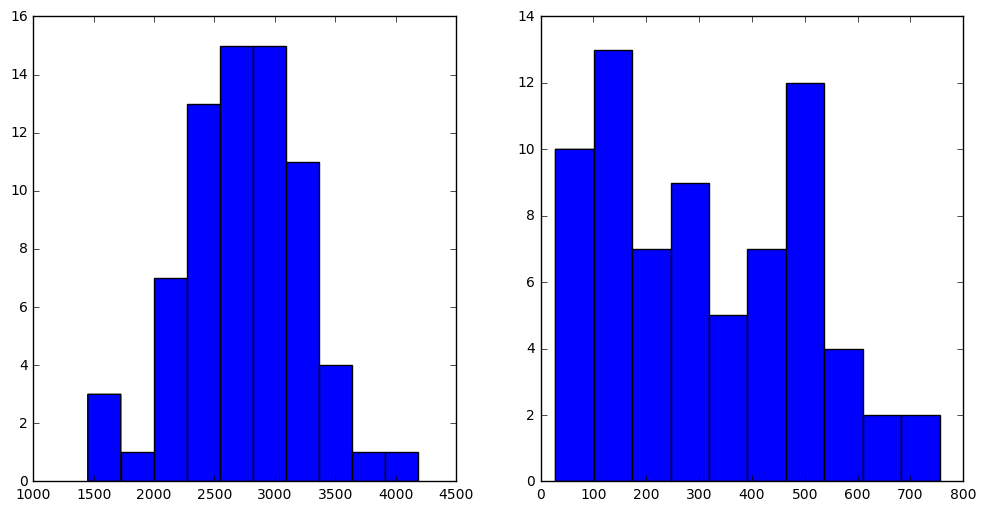

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create distribution plots
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df_hof['H'])
ax2.hist(df_hof['HR'])
plt.show()

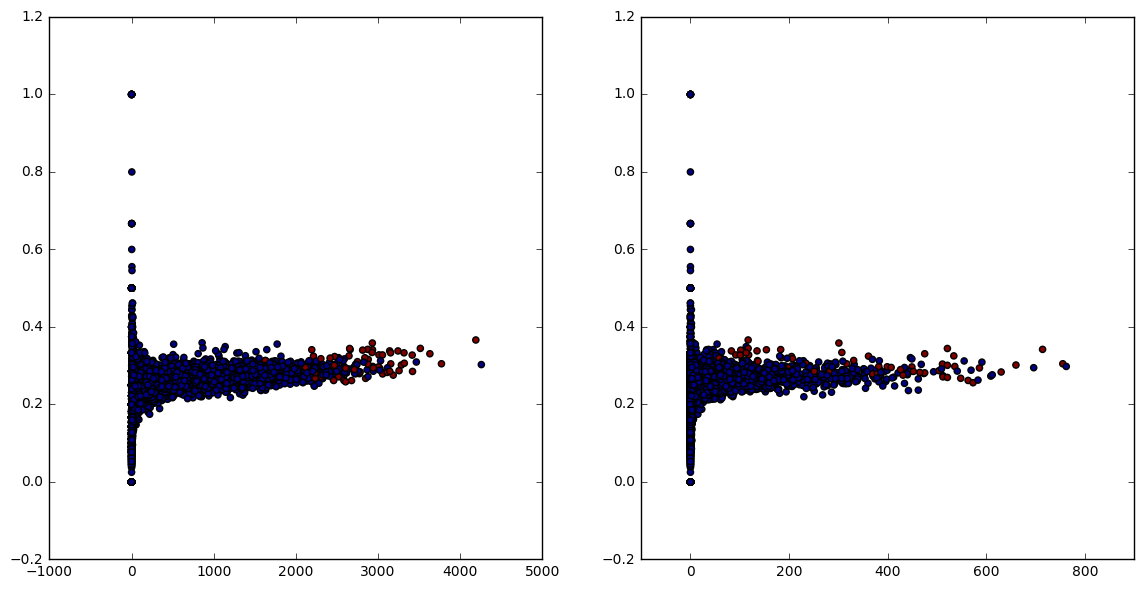

In [222]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(df['H'], df['AVE'], c=df['HoF'])
ax2.scatter(df['HR'], df['AVE'], c=df['HoF'])
plt.show()

In [193]:
print(df.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', '3B', 'R',
       '2B', 'SO', 'SF', 'DPf', 'G', 'HR', 'HBP', 'BB', 'Ef', 'H', 'SB', 'Af',
       'AB', 'Years_Played', 'RBI', 'AS_games', 'Gold Glove', 'Silver Slugger',
       'Rookie of the Year', 'Most Valuable Player', 'HoF', 'World Series MVP',
       'bats_R', 'throws_R', 'pos2', 'infielder', 'pos__1B', 'pos__2B',
       'pos__3B', 'pos__OF', 'pos__SS', 'debutYear', 'finalYear', 'pre1920',
       '1977-92', '1993-2009', '1920-41', '1946-62', '1963-76', '1942-45',
       'YSR', 'AVE', 'OBP', 'Slug_Percent', 'OPS'],
      dtype='object')


In [194]:
num_cols_hitters = ['playerID', 'nameFirst', 'nameLast', 'HoF', 'Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',  'RBI',
       'R', 'SB',  '2B', '3B', 'G', 'AB', 'SO', 'Most Valuable Player', 'World Series MVP', 'AS_games','Gold Glove', 'Rookie of the Year', 
       'Silver Slugger', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef','pos__1B', 'pos__2B', 
       'pos__3B', 'pos__SS', 'infielder', 'pos__OF', 'YSR', 'pre1920', '1920-41', '1942-45', '1946-62', '1963-76',
       '1977-92', '1993-2009']
data = df_hitters[num_cols_hitters]

In [195]:
print(data.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 32, 30, 32, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [196]:
# Eliminating rows with null values
data = data.dropna()

In [197]:
print(len(data))
print(len(data[data['HoF'] == 1]))

6306
60


In [198]:
print(data_hof.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'HoF', 'Years_Played', 'H', 'BB',
       'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'RBI', 'R', 'SB', '2B', '3B',
       'G', 'AB', 'SO', 'Most Valuable Player', 'World Series MVP', 'AS_games',
       'Gold Glove', 'Rookie of the Year', 'Silver Slugger', 'bats_R',
       'throws_R', 'DPf', 'Af', 'Ef', 'pos__1B', 'pos__2B', 'pos__3B',
       'pos__SS', 'infielder', 'pos__OF', 'YSR', 'pre1920', '1920-41',
       '1942-45', '1946-62', '1963-76', '1977-92', '1993-2009'],
      dtype='object')


In [199]:
target = data['HoF']
features = data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'], axis=1)

In [200]:
from sklearn.cross_validation import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
kf = KFold(features.shape[0], random_state=1)

predictions_lr = cross_val_predict(lr, features, target, cv=kf)
predictions_lr = pd.Series(predictions_lr)

In [201]:
np_predictions_lr = predictions_lr.as_matrix()
np_target = data['HoF'].as_matrix()

In [202]:
tn_filter_lr = (np_predictions_lr == 0) & (np_target == 0)
tn_lr = len(np_predictions_lr[tn_filter_lr])

tp_filter_lr = (np_predictions_lr == 1) & (np_target == 1)
tp_lr = len(np_predictions_lr[tp_filter_lr])

fn_filter_lr = (np_predictions_lr == 0) & (np_target == 1)
fn_lr = len(np_predictions_lr[fn_filter_lr])

fp_filter_lr = (np_predictions_lr == 1) & (np_target == 0)
fp_lr = len(np_predictions_lr[fp_filter_lr])

In [203]:
print(tn_lr)
print(tp_lr)
print(fn_lr)
print(fp_lr)
tnr_lr = tn_lr / (tn_lr + fp_lr)
tpr_lr = tp_lr / (tp_lr + fn_lr)
fnr_lr = fn_lr / (fn_lr + tp_lr)
fpr_lr = fp_lr / (fp_lr + tn_lr)


print(tpr_lr)
print(fpr_lr)

print(tnr_lr)
print(fnr_lr)

6213
52
8
33
0.8666666666666667
0.005283381364073006
0.994716618635927
0.13333333333333333


In [204]:
from sklearn.ensemble import RandomForestClassifier

penalty = {
    0: 50,
    1: 1
}

rf = RandomForestClassifier(random_state=1,n_estimators=11, max_depth=10, min_samples_leaf=1, class_weight=penalty)
predictions_rf = cross_val_predict(rf, features, target, cv=kf)
predictions_rf = pd.Series(predictions_rf)

In [205]:
print(len(predictions_rf))
print(len(data['HoF']))

6306
6306


In [206]:
np_predictions_rf = predictions_rf.as_matrix()

In [207]:
tn_filter_rf = (np_predictions_rf == 0) & (np_target == 0)
tn_rf = len(np_predictions_rf[tn_filter_rf])

tp_filter_rf = (np_predictions_rf == 1) & (np_target == 1)
tp_rf = len(np_predictions_rf[tp_filter_rf])

fn_filter_rf = (np_predictions_rf == 0) & (np_target == 1)
fn_rf = len(np_predictions_rf[fn_filter_rf])

fp_filter_rf = (np_predictions_rf == 1) & (np_target == 0)
fp_rf = len(np_predictions_rf[fp_filter_rf])

In [208]:
print(tn_rf)
print(tp_rf)
print(fn_rf)
print(fp_rf)

6239
47
13
7


In [209]:
tnr_rf = tn_rf / (tn_rf + fp_rf)
tpr_rf = tp_rf / (tp_rf + fn_rf)
fnr_rf = fn_rf / (fn_rf + tp_rf)
fpr_rf = fp_rf / (fp_rf + tn_rf)

In [210]:
print(tpr_rf)
print(tnr_rf)
print(fpr_rf)
print(fnr_rf)

0.7833333333333333
0.9988792827409542
0.0011207172590457894
0.21666666666666667


In [211]:
new_data = df_eligable[num_cols_hitters]
print(new_data.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [212]:
print(df_eligable.columns)

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', '3B', 'R',
       '2B', 'SO', 'SF', 'DPf', 'G', 'HR', 'HBP', 'BB', 'Ef', 'H', 'SB', 'Af',
       'AB', 'Years_Played', 'RBI', 'AS_games', 'Gold Glove', 'Silver Slugger',
       'Rookie of the Year', 'Most Valuable Player', 'HoF', 'World Series MVP',
       'bats_R', 'throws_R', 'pos2', 'infielder', 'pos__1B', 'pos__2B',
       'pos__3B', 'pos__OF', 'pos__SS', 'debutYear', 'finalYear', 'pre1920',
       '1977-92', '1993-2009', '1920-41', '1946-62', '1963-76', '1942-45',
       'YSR', 'AVE', 'OBP', 'Slug_Percent', 'OPS'],
      dtype='object')


In [213]:
new_data = new_data.dropna()
new_features = new_data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'], axis=1)

In [214]:
rf.fit(features, target)
probabilities = rf.predict_proba(new_features)

In [215]:
hof_predictions = pd.DataFrame(probabilities[:,1])

In [216]:
hof_predictions = hof_predictions.sort_values(0,ascending=False)

In [217]:
print(hof_predictions.head(50))

             0
1077  1.000000
168   1.000000
113   1.000000
565   1.000000
926   1.000000
883   1.000000
455   1.000000
472   0.909498
1034  0.909091
500   0.909091
501   0.909091
829   0.909091
898   0.909091
1008  0.909091
732   0.909091
82    0.909091
938   0.909091
818   0.909091
98    0.818589
48    0.818589
1131  0.818589
606   0.818183
285   0.818183
1078  0.818182
46    0.818182
83    0.818182
1058  0.727680
5     0.727286
582   0.727273
734   0.727273
434   0.727273
459   0.727273
20    0.636771
433   0.636364
270   0.545875
636   0.545862
1134  0.545477
180   0.545456
405   0.545455
700   0.454580
360   0.364045
892   0.363650
316   0.363636
387   0.273245
372   0.273170
809   0.272749
328   0.272749
443   0.272749
616   0.272728
895   0.182336


In [218]:
for i, row in hof_predictions.head(50).iterrows():
    print(new_data.iloc[i,1:28])

nameFirst                  Frank
nameLast                  Thomas
HoF                            1
Years_Played                  19
H                           2468
BB                          1667
HR                           521
AVE                     0.301012
OBP                     0.419116
Slug_Percent            0.554946
OPS                     0.974044
RBI                         1704
R                           1494
SB                            32
2B                           495
3B                            12
G                           2322
AB                          8199
SO                          1397
Most Valuable Player           2
World Series MVP               0
AS_games                       5
Gold Glove                     0
Rookie of the Year             0
Silver Slugger                 4
bats_R                         1
throws_R                       1
Name: 17144, dtype: object
nameFirst                 Miguel
nameLast                 Cabrera
HoF             